In [1]:
import pandas as pd

import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [2]:
df = pd.read_csv('HDFCBANK.NS_data.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
df1 = pd.read_csv('NSE-TATAGLOBAL.csv')

In [4]:
df1.shape

(2035, 8)

In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-02 00:00:00+05:30,196.197136,196.608832,191.897178,195.259384,3514998,0.0,0.0
2012-01-03 00:00:00+05:30,197.340775,201.686481,196.700358,200.885956,3439238,0.0,0.0
2012-01-04 00:00:00+05:30,202.143915,203.539124,197.089179,202.784332,4871478,0.0,0.0
2012-01-05 00:00:00+05:30,203.104520,204.339621,201.411977,202.944412,3380606,0.0,0.0
2012-01-06 00:00:00+05:30,201.732181,209.119876,200.794429,207.358719,3977222,0.0,0.0


In [6]:
df.shape

(2713, 7)

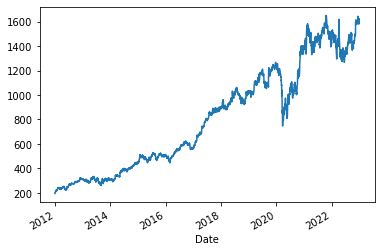

In [7]:
df['Close'].plot()

In [8]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open','High','Low','Volume']


In [9]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2012-01-02 00:00:00+05:30,0.000000,0.000000,0.000000,0.017476
2012-01-03 00:00:00+05:30,0.000778,0.003410,0.003333,0.017100
2012-01-04 00:00:00+05:30,0.004045,0.004654,0.003603,0.024221
2012-01-05 00:00:00+05:30,0.004699,0.005191,0.006602,0.016808
2012-01-06 00:00:00+05:30,0.003765,0.008401,0.006174,0.019774


In [10]:
timesplit= TimeSeriesSplit(n_splits=50)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


In [12]:
#!pip install pydot

In [13]:
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [14]:
history=lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
333/333 [==============================] - 3s 3ms/step - loss: 776627.5625
Epoch 2/50
333/333 [==============================] - 1s 3ms/step - loss: 711664.0625
Epoch 3/50
333/333 [==============================] - 1s 3ms/step - loss: 617626.0625
Epoch 4/50
333/333 [==============================] - 1s 3ms/step - loss: 505744.8750
Epoch 5/50
333/333 [==============================] - 1s 3ms/step - loss: 390512.5625
Epoch 6/50
333/333 [==============================] - 1s 3ms/step - loss: 283356.8750
Epoch 7/50
333/333 [==============================] - 1s 3ms/step - loss: 192103.8750
Epoch 8/50
333/333 [==============================] - 1s 3ms/step - loss: 121025.3594
Epoch 9/50
333/333 [==============================] - 1s 3ms/step - loss: 70879.5938
Epoch 10/50
333/333 [==============================] - 1s 3ms/step - loss: 39341.1055
Epoch 11/50
333/333 [==============================] - 1s 3ms/step - loss: 21957.1328
Epoch 12/50
333/333 [==============================] - 

In [15]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

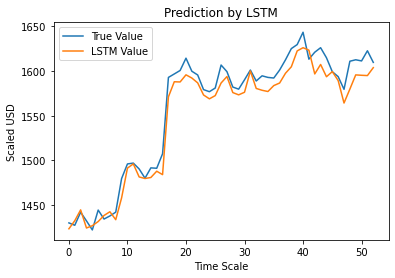

In [16]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()